In [18]:
import os
import cv2

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.image as mpimg

import open3d as o3d

In [72]:
idx = "000000"

int_dir = "C:/Users/lucas/Desktop/UPC/MIT/tactile2object/intrinsics_extrinsics/20210709_004128/020122061233"
int_dir = "C:/Users/lucas/Desktop/UPC/MIT/tactile2object/intrinsics_extrinsics/20210709_004128/020122061233"

depth_name = f"aligned_depth_to_color_{idx}.png"
color_name = f"color_{idx}.jpg"

depth_pth = os.path.join(int_dir, depth_name)
color_pth = os.path.join(int_dir, color_name)

depth = mpimg.imread(depth_pth)
color = mpimg.imread(color_pth)

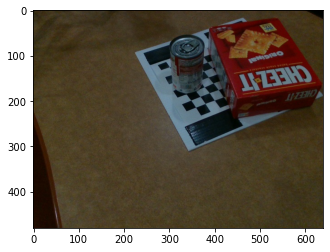

In [78]:
plt.imshow(color)

In [94]:
depth = mpimg.imread(depth_pth)
color = mpimg.imread(color_pth)
cam_scale = 1

dimx_new, dimy_new = 640, 480
dimx_old, dimy_old = 1280, 720

image = np.array(color.copy())
H, W, _ = image.shape

fx, fy, cx, cy = 914.28, 913.523, 625.845, 364.963 #get_intrinsic()
fx_old, fy_old, cx, cy = 914.28, 913.523, 625.845, 364.963

fx_new = (dimx_new / dimx_old) * fx_old
fy_new = (dimy_new / dimy_old) * fy_old

intrinsic = o3d.camera.PinholeCameraIntrinsic(W,H,fx_new,fy_new,cx,cy)
img = o3d.geometry.Image(image.astype(np.uint8))
depth = np.asarray(depth).astype(np.float32) / cam_scale
depth = o3d.geometry.Image(depth)

In [95]:
rgbd = o3d.geometry.RGBDImage.create_from_color_and_depth(img, depth)
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd, intrinsic)

In [96]:
o3d.visualization.draw_geometries([pcd])